# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [0]:
import tensorflow as tf
import numpy as  np
import matplotlib.pyplot as plt
import math as ma
import random

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

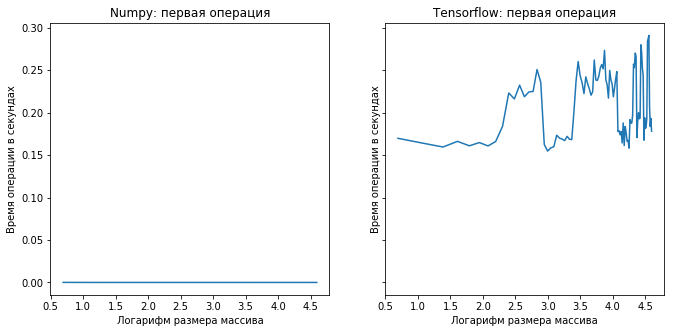

In [0]:
# Для первой операции
random.seed(42)
import time

sess = tf.compat.v1.Session()

tf_time = []
tf_ns = []
np_time = []
ns = []
ns_np = []

for n in range(2, 100):
    x = tf.random.normal(shape = (n, n))
    y = tf.reduce_sum(tf.diag_part(x)**2)
    begin = time.time()
    sess.run(y)
    end = time.time()
    time_spent = end - begin
    tf_time.append(time_spent)
    ns.append(n)
    
for n in range(2, 100): 
    x = np.random.normal(size = (n, n))
    begin = time.time()
    y = np.sum(np.diag(x)**2)
    end = time.time()
    time_spent = end - begin
    np_time.append(time_spent)
    ns_np.append(n)


# plot results

# plots
ns_np_log = []
for i in ns_np: 
  i = ma.log(i)
  ns_np_log.append(i)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(11, 5), sharey = True) # зададим общую ось для более простого сравнения

ax1.plot(ns_np_log,np_time)
ax1.set_title("Numpy: первая операция")
ax1.set_xlabel("Логарифм размера массива")
ax1.set_ylabel("Время операции в секундах")

ax2.plot(ns_np_log, tf_time)
ax2.set_title("Tensorflow: первая операция")
ax2.set_xlabel("Логарифм размера массива")
ax2.set_ylabel("Время операции в секундах")

plt.show()

sess.close()

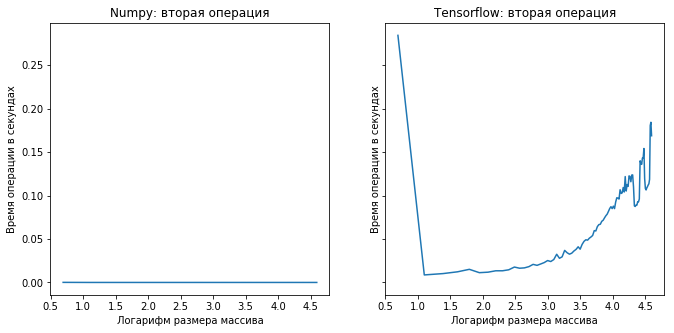

In [2]:
# Для второй операции
random.seed(42)
import time

sess = tf.compat.v1.Session()

tf_time = []
tf_ns = []
np_time = []
ns = []
ns_np = []

for n in range(2, 100):
    x = tf.random.normal(shape = (n, ))
    x2 = tf.random.normal(shape = (n, ))
    
    y = tf.acos(tf.tensordot(x, x2, 1)/(tf.linalg.norm(x) * tf.linalg.norm(x2)))
    
    begin = time.time()
    sess.run(y)
    end = time.time()
    time_spent = end - begin
    tf_time.append(time_spent)
    ns.append(n)
    
for n in range(2, 100): 
    x = np.random.normal(size = n)
    x2 = np.random.normal(size = n)
    begin = time.time()
    y = np.arccos(np.dot(x, x2)/(np.linalg.norm(x) * np.linalg.norm(x2)))
    end = time.time()
    time_spent = end - begin
    np_time.append(time_spent)
    ns_np.append(n)


# plot results

# plots
ns_np_log = []
for i in ns_np: 
  i = ma.log(i)
  ns_np_log.append(i)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(11, 5), sharey = True)

ax1.plot(ns_np_log,np_time)
ax1.set_title("Numpy: вторая операция")
ax1.set_xlabel("Логарифм размера массива")
ax1.set_ylabel("Время операции в секундах")

ax2.plot(ns_np_log, tf_time)
ax2.set_title("Tensorflow: вторая операция")
ax2.set_xlabel("Логарифм размера массива")
ax2.set_ylabel("Время операции в секундах")

plt.show()

sess.close()

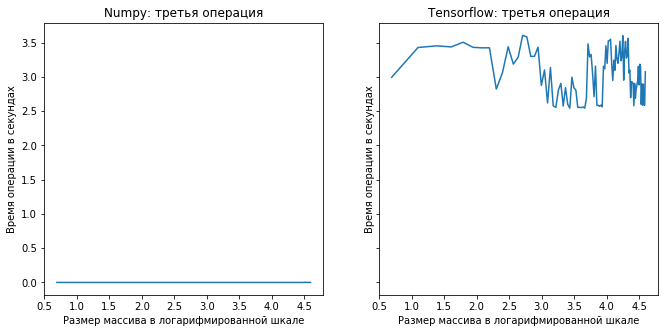

In [84]:
# Для третей операции 
random.seed(42)
import time

sess = tf.compat.v1.Session()

tf_time_3 = []
tf_ns_3 = []
np_time_3 = []
ns_3 = []
ns_np_3 = []

for n in range(2, 100):
    A = tf.random.normal(shape = (n, n))
    B = tf.random.normal(shape = (n, n))
    
    C = tf.matmul(A, B) - tf.matmul(B, A)
    
    begin = time.time()
    sess.run(C)
    end = time.time()
    time_spent = end - begin
    tf_time_3.append(time_spent)
    ns_3.append(n)
    
for n in range(2, 100): 
    A = np.random.normal(size = (n, n))
    B = np.random.normal(size = (n, n))
    begin = time.time()
    C = np.dot(A, B) - np.dot(B, A) 
    end = time.time()
    
    time_spent = end - begin
    np_time_3.append(time_spent)
    ns_np_3.append(n)


# plot results

# plots
ns_np_log = []
for i in ns_3: 
  i = ma.log(i)
  ns_np_log.append(i)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(11, 5), sharey = True)

ax1.plot(ns_np_log,np_time_3)
ax1.set_title("Numpy: третья операция")
ax1.set_xlabel("Размер массива в логарифмированной шкале")
ax1.set_ylabel("Время операции в секундах")

ax2.plot(ns_np_log, tf_time_3)
ax2.set_title("Tensorflow: третья операция")
ax2.set_xlabel("Размер массива в логарифмированной шкале")
ax2.set_ylabel("Время операции в секундах")

plt.show()

sess.close()

Как можно заметить, для всех трех операций, скорость их выполнения в numpy выше для любого размера массива данных по сравнению с tensorflow. Можно предположить, что это связано с дополнительным временем, требующимся на открытие сессии и передачу данных в tensorflow, в то время как в numpy операции выполняются мнгновенно.


Возможно, проблема еще в использовании системной памяти и GPU.

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [0]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте **графики значения функции потерь от номера итерации**. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [0]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

In [0]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

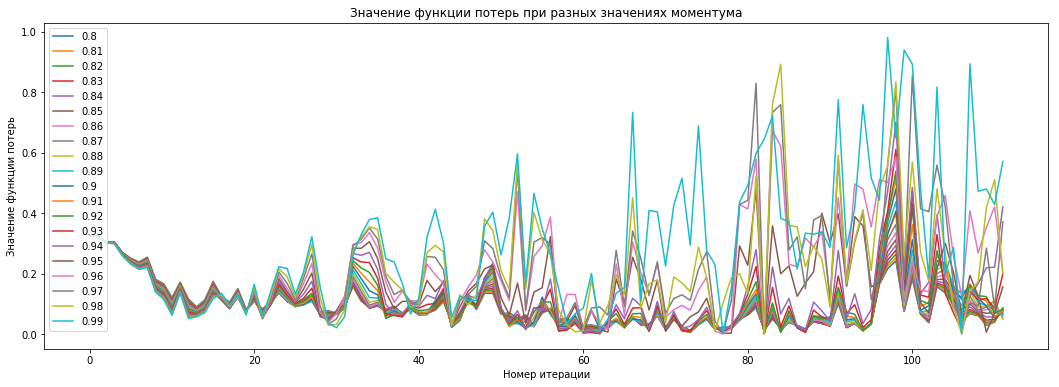

In [83]:
# YOUR CODE !
# Так как конвенциональные значения моментума лежат в диапазоне 0.8-0.99, будем рассматривать их с шагом 0.01

for momentum_size in np.arange(0.8, 1, 0.01):
  optimizer = tf.train.MomentumOptimizer(momentum = momentum_size, learning_rate = 0.01).minimize(loss)
  loss_history = train(X, y, train_op = optimizer)
  
  
  plt.plot(loss_history, label = round(momentum_size, 2))
  plt.rcParams['figure.figsize'] = [20, 9]
  plt.legend(loc='upper left')
  plt.title("Значение функции потерь при разных значениях моментума")
  plt.xlabel("Номер итерации")
  plt.ylabel("Значение функции потерь")

Так как такой график достаточно тяжело воспринимать, поэтому построим отдельные графики для моментума размеров 0.8 - 0.9 и 0.9 - 1 также с шагом 0.01 и сравним их.

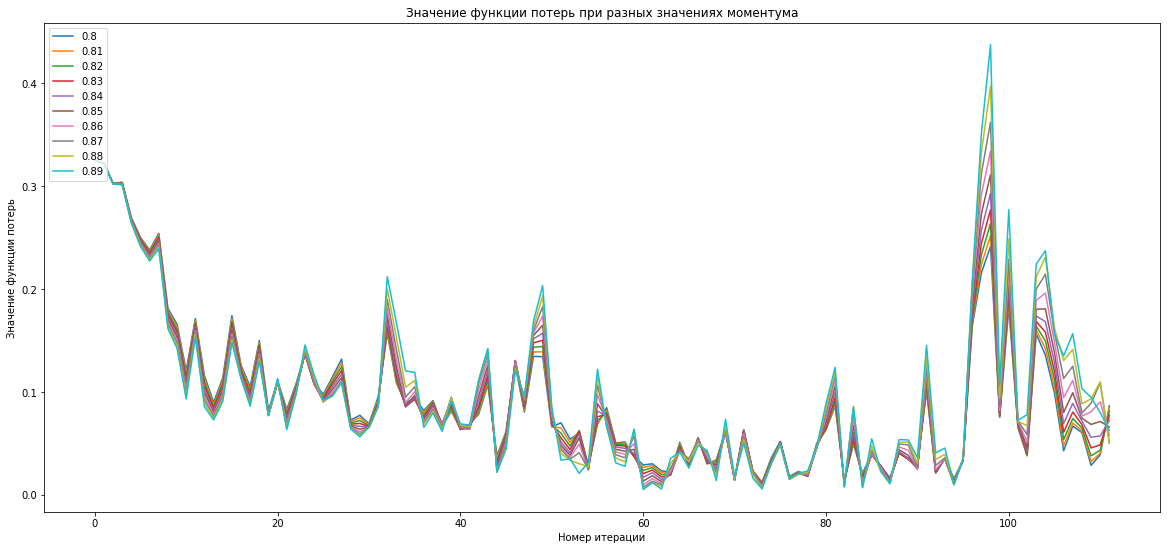

In [87]:
for momentum_size in np.arange(0.8, 0.9, 0.01):
  optimizer = tf.train.MomentumOptimizer(momentum = momentum_size, learning_rate = 0.01).minimize(loss)
  loss_history = train(X, y, train_op = optimizer)
  
  
  plt.plot(loss_history, label = round(momentum_size, 2))
  plt.rcParams['figure.figsize'] = [20, 9]
  plt.legend(loc='upper left')
  plt.title("Значение функции потерь при разных значениях моментума")
  plt.xlabel("Номер итерации")
  plt.ylabel("Значение функции потерь")

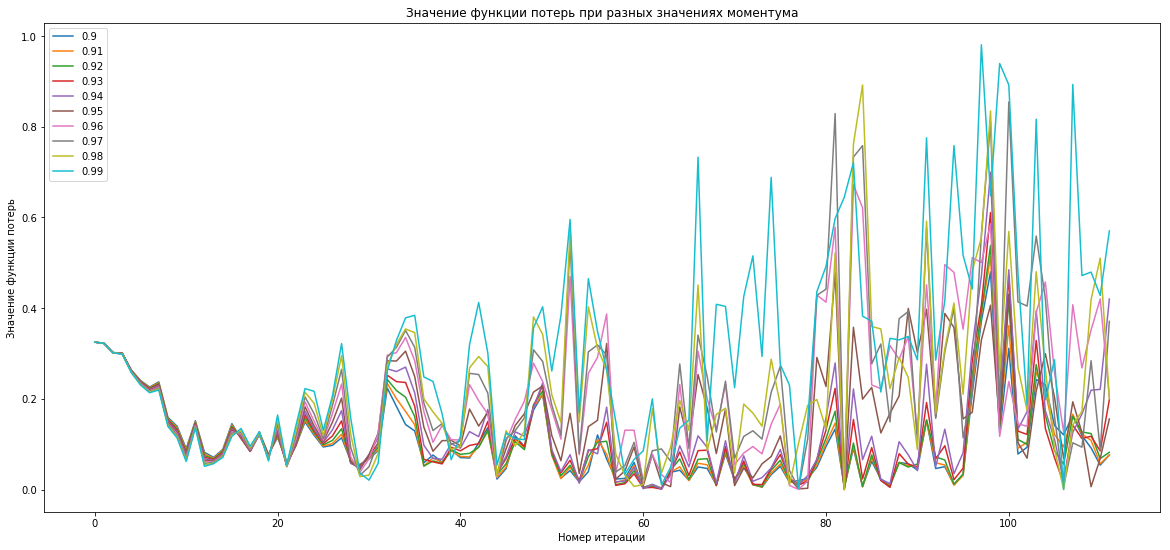

In [88]:
for momentum_size in np.arange(0.9, 1, 0.01):
  optimizer = tf.train.MomentumOptimizer(momentum = momentum_size, learning_rate = 0.01).minimize(loss)
  loss_history = train(X, y, train_op = optimizer)
  
  
  plt.plot(loss_history, label = round(momentum_size, 2))
  plt.rcParams['figure.figsize'] = [20, 9]
  plt.legend(loc='upper left')
  plt.title("Значение функции потерь при разных значениях моментума")
  plt.xlabel("Номер итерации")
  plt.ylabel("Значение функции потерь")

На основании этих графиков отберем размеры моментума, на которых наименьшее значение функции потерь и сравним их.

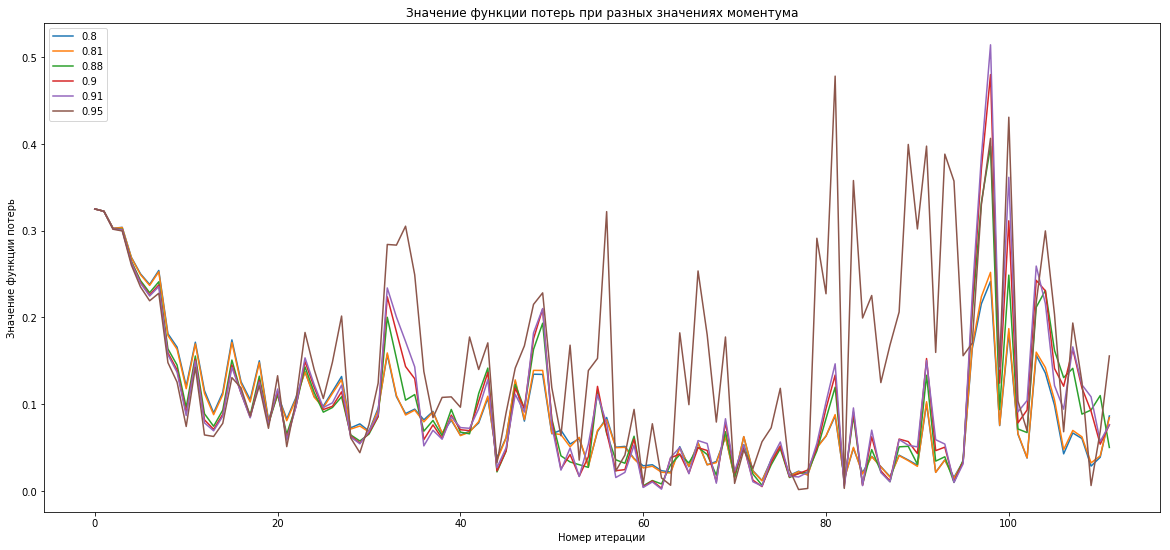

In [89]:
for momentum_size in [0.8, 0.81, 0.88, 0.9, 0.91, 0.95]:
  optimizer = tf.train.MomentumOptimizer(momentum = momentum_size, learning_rate = 0.01).minimize(loss)
  loss_history = train(X, y, train_op = optimizer)
  
  
  plt.plot(loss_history, label = round(momentum_size, 2))
  plt.rcParams['figure.figsize'] = [20, 9]
  plt.legend(loc='upper left')
  plt.title("Значение функции потерь при разных значениях моментума")
  plt.xlabel("Номер итерации")
  plt.ylabel("Значение функции потерь")

На основании этих графиков выберем размер моментума 0.88


**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

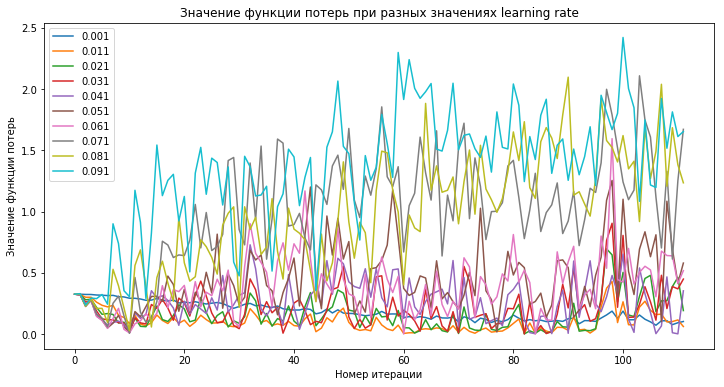

In [93]:
# YOUR CODE !

for rate in np.arange(0.001, 0.1, 0.01):
  optimizer = tf.train.MomentumOptimizer(momentum = 0.88,learning_rate = rate).minimize(loss)
  loss_history = train(X, y, train_op = optimizer)
   
  plt.plot(loss_history, label = round(rate, 3))
  plt.rcParams['figure.figsize'] = [12, 6]
  plt.legend(loc='upper left')
  plt.title("Значение функции потерь при разных значениях learning rate")
  plt.xlabel("Номер итерации")
  plt.ylabel("Значение функции потерь")


Ваш ответ: на основании этого графика выберем learning rate равный 0.011

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

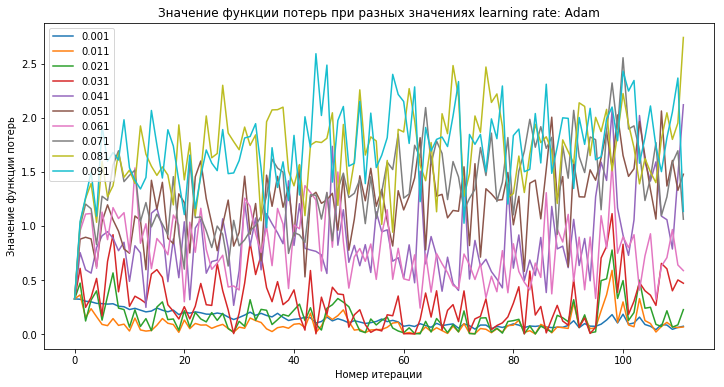

In [92]:
for rate in np.arange(0.001, 0.1, 0.01):
  optimizer = tf.train.AdamOptimizer(learning_rate = rate).minimize(loss)
  loss_history = train(X, y, train_op = optimizer)
  
  plt.plot(loss_history, label = round(rate, 3))
  plt.rcParams['figure.figsize'] = [12, 6]
  plt.legend(loc='upper left')
  plt.title("Значение функции потерь при разных значениях learning rate: Adam")
  plt.xlabel("Номер итерации")
  plt.ylabel("Значение функции потерь")

Ваш ответ: на основании этого графика, предпочтительным значением learning rate является 0.011.

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

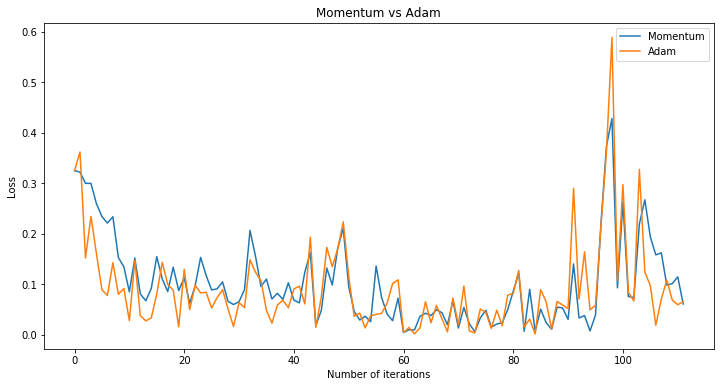

In [96]:
optimizer_momentum = tf.train.MomentumOptimizer(momentum = 0.88, learning_rate = 0.011).minimize(loss)
loss_history_momentum = train(X, y, train_op = optimizer_momentum)

optimizer_adam = tf.train.AdamOptimizer(learning_rate = 0.011).minimize(loss)
loss_history_adam = train(X, y, train_op = optimizer_adam)

plt.plot(loss_history_momentum, label = "Momentum")
plt.plot(loss_history_adam, label = "Adam")
plt.legend()
plt.title("Momentum vs Adam")
plt.ylabel("Loss")
plt.xlabel("Number of iterations")

plt.show();

Исходя из этого графика видно, что Momentum и Adam выдают примерно одинаковое значение функции потерь, но при этом Momentum является более предпочтительным для решения данной задачи, т.к. на большем количестве итераций получает меньшую ошибку.

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [74]:
from google.colab import files 
src = list(files.upload().values())[0]
open("mnist.py", "wb").write(src)
import mnist

Saving mnist.py to mnist (1).py


In [0]:
from mnist import load_dataset

X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

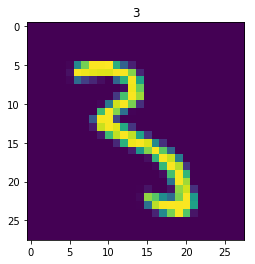

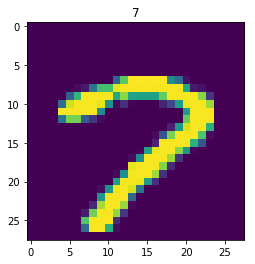

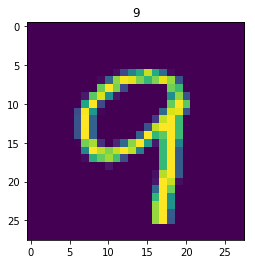

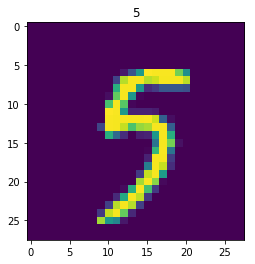

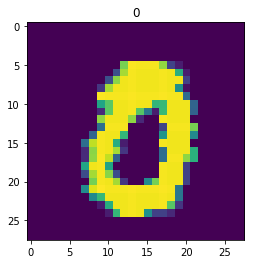

In [0]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [108]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(5): # количество эпох, увеличиваем, т.к. предыдущие запуски модели показывали недообучение
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)

        for epoch in range(1):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", accuracy_score(y_test, prediction_history))
    return loss_history_train, loss_history_test
  
X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]

layer1 = tf.layers.dense(X_input, 560, activation=tf.nn.relu)
layer2 = tf.layers.dense(layer1, 428, activation=tf.nn.relu)
layer3 = tf.layers.dense(layer2, 320, activation=tf.nn.relu)

#<define architecture as a function of X_input>

logits = tf.layers.dense(layer3, n_labels)
predicted = tf.nn.softmax(logits) #<define 10-class outputs>

loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=tf.one_hot(y_input, depth=n_labels)) #<define log loss with one-hot vector of labels
train_op = tf.train.AdamOptimizer().minimize(loss) #<define train operation here>

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

Test accuracy:  0.9766


Одной эпохи, то есть одного прохода может быть недостаточно, так как это приводит к недообучению модели. Однако чем больше эпох, и, соответственно, чем большее количество раз мы передаем датасет нейросети, тем чаще меняются веса модели, и она переобучается. Путем переставлений было выбрано количество эпох, равное 5. 


## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

Вот картинка

![Вот картинка](https://sun9-35.userapi.com/c852028/v852028952/14000a/OPXs03ESXl0.jpg)

**Задание 4.2**. Напищите ниже фидбек по заданию и по курсу в целом. 

Пока достаточно смутные впечатления от курса, в том числе и потому, что в неделю только одно занятие, зато много форм контроля. И чатик. 